# Exploratory Data Analysis

###### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
## Credentials of our spotify 'app' KIBRAM
CLIENT_ID = 'd32d970f8a764cdab2105e8b30ea57a5'
CLIENT_SECRET = 'b79d137c445342b985da989370f8febc'

In [3]:
manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = manager)

### Data collection

Note that the spotify database is in the variable `sp`. We directly implement some pre-processing steps, like verifying for and getting rid of data containing `None` values, 

In [4]:
## Unfortunately, Spotify only allows fetching data for a maximum of 50 tracks at once
#### ALBUMS
al_name = []
al_type = []
al_id = []
al_img = [] 

al_artists = []
al_artist_ids = []
al_URI = []
al_realease = []

for i in range(0,1000,50):
    raw_albums = sp.search(q = 'year:2023', type = 'album', limit = 50,offset = i)
    for i, album in enumerate(raw_albums['albums']['items']):
        if album is not None:
            al_name.append(album['name'])
            al_type.append(album['album_type'])
            al_id.append(album['id'])
            al_img.append(album['images'][0]['url'])

            art_name = [album['artists'][j]['name'] for j in range(len(album['artists']))]
            art_id = [album['artists'][j]['id'] for j in range(len(album['artists']))]
            al_artists.append(art_name)
            al_artist_ids.append(art_id)        

            al_URI.append(album['uri'])
            al_realease.append(album['release_date'])

In [5]:
#### ARTISTS
ar_name = []
ar_followers = []
ar_genres = []
ar_id = []
ar_img = []
ar_popularity = []
ar_URI = []

for i in range(0,650,50):
    raw_artists = sp.search(q = 'year:2023', type = 'artist', limit = 50,offset = i)
    for i, artist in enumerate(raw_artists['artists']['items']):
        if artist is not None:
            ar_name.append(artist['name'])
            ar_followers.append(artist['followers']['total'])

            genre = "None" if len(artist['genres']) == 0 else artist['genres'][0]
            ar_genres.append(genre)

            ar_id.append(artist['id'])
            ar_popularity.append(artist['popularity'])
            ar_URI.append(artist['uri'])

            img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
            ar_img.append(img_url)

In [6]:
#### TRACKS
tr_name = []
tr_id = []

tr_popularity = []
tr_URI = []

tr_art_id = []
tr_art_name = []
tr_art_img = []

tr_alb_id = []
tr_alb_name = []
tr_alb_img = []



for i in range(0,1000,50):
    raw_tracks = sp.search(q = 'year:2023', type = 'track', limit = 50,offset = i)
    for i, track in enumerate(raw_tracks['tracks']['items']):
        
        tr_name.append(track['name'])
        tr_id.append(track['id'])
        tr_popularity.append(track['popularity'])
        tr_URI.append(track['uri'])
        
        
        art_name = [track['artists'][j]['name'] for j in range(len(track['artists']))]
        art_id = [track['artists'][j]['id'] for j in range(len(track['artists']))]
        img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
        tr_art_img.append(img_url)
        tr_art_name.append(art_name)
        tr_art_id.append(art_id)
        
        img_url = "None" if len(artist['images']) == 0 else artist['images'][0]['url']
        tr_alb_img.append(img_url)
        tr_alb_name.append(track['album']['name'])
        tr_alb_id.append(track['album']['id'])    

##### Spotify audio features

1. Confidence measures

    - Acousticness: A measure from 0.0 to 1.0 that detects acoustic sounds in a track.

    - Liveness: A measure from 0.0 to 1.0 that detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

    - Speechiness: A measure from 0.0 to 1.0 that detects the presence of spoken words in a track. The more speech sounds are heard in the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the value will be.

    - Instrumentalness A measure from 0.0 to 1 that reflects the extent to which a track does not contain vocalizations. The closer the instrumentalness value is to 1.0, the greater the likelihood that the track does not contain vocal content.

2. Cerceptual measures

    - Energy: A measure from 0.0 to 1.0 that reflects the intensity of a track. Energetic tracks are usually fast, loud, and noisy.

    - Loudness: A measure from -60 and 0 that represents the overall loudness of a track. This value is measured in decibels (dB). Loudness values are averaged across the entire track.

    - Danceability: A measure from 0.0 to 1 that indicates how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength. A value closer to 0.0 indicates that a track is less danceable, and value closer to 1.0 is indicates that a track is more danceable.

    - Valence: A measure from 0.0 to 1.0 that reflects the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

3. Music descriptors

    - Tempo: The overall estimated speed of a track measured in beats per minute (BPM).

    - Duration: The duration of a track measured in milliseconds.

    - Key: A measure from 0 to 11 that indicates the key of a track.

    - Mode: A measure that indicates the key in the music of the track (1 is major, and 0 is for minor).

In [7]:
#### AUDIO FEATURES
acousticness = []
danceability = []
duration = []
energy = []
instrumentalness = []
key = []
liveness = []
loudness = []
modality = []
speechiness = []
tempo = []
valence = [] # positiveness of a track
id_withfeatures = []


for track_id in tr_id:
    audio_info = sp.audio_features(track_id)[0]
    if audio_info is not None:
        acousticness.append(audio_info['acousticness'])
        danceability.append(audio_info['danceability'])
        duration.append(audio_info['duration_ms'])
        energy.append(audio_info['energy'])
        instrumentalness.append(audio_info['instrumentalness'])
        key.append(audio_info['key'])
        liveness.append(audio_info['liveness'])
        loudness.append(audio_info['loudness'])
        modality.append(audio_info['mode'])
        speechiness.append(audio_info['speechiness'])
        tempo.append(audio_info['tempo'])
        valence.append(audio_info['valence'])
        id_withfeatures.append(track_id)    

### Data exploration and cleaning

In [8]:
df_artist = pd.DataFrame({'id' : ar_id, 'name': ar_name, 'followers' : ar_followers, 'genres' : ar_genres, 
                          'popularity' : ar_popularity, 'URI' : ar_URI, 'image URL' : ar_img})

df_album = pd.DataFrame({'id' : al_id, 'name': al_name, 'type' : al_type, 'artists' : al_artists, 
                          'artists ids' : al_artist_ids, 'URI' : al_URI, 
                         'release date' : al_realease, 'image URL' : al_img})

df_track = pd.DataFrame({'id' : tr_id, 'name': tr_name, 'popularity' : tr_popularity, 'URI' : tr_URI, 
                         'artist id' : tr_art_id, 'artist name' : tr_art_name,'artist image URL' : tr_art_img,
                        'album id' : tr_alb_id, 'album name' : tr_alb_name})

df_audiofeat = pd.DataFrame({'id' : id_withfeatures, 'acousticness' : acousticness, 'danceability' : danceability, 
                             'duration' : duration, 'energy' : energy, 'instrumentalness' : instrumentalness,
                            'key' : key, 'liveness' : liveness, 'loudness' : loudness, 'modality' : modality,
                            'speechiness' : speechiness, 'tempo' : tempo,'valence' : valence})


In [9]:
df_artist.head()

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,71194980,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...
1,3TVXtAsR1Inumwj472S9r4,Drake,73660940,canadian hip hop,97,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...
2,4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,5428604,contemporary country,93,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,https://i.scdn.co/image/ab6761610000e5eb0266f7...
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,62165751,canadian contemporary r&b,98,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5ebb5f9e2...
4,7tYKF4w9nC0nq9CsPZTHyP,SZA,11705818,pop,93,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,https://i.scdn.co/image/ab6761610000e5eb7eb7f6...


In [10]:
df_album.head()

,id,name,type,artists,artists ids,URI,release date,image URL
0,6i7mF7whyRJuLJ4ogbH2wh,One Thing At A Time,album,[Morgan Wallen],[4oUHIQIBe0LHzYfvXNW4QM],spotify:album:6i7mF7whyRJuLJ4ogbH2wh,2023-03-03,https://i.scdn.co/image/ab67616d0000b273705079...
1,4kS7bSuU0Jm9LYMosFU2x5,MAÑANA SERÁ BONITO,album,[KAROL G],[790FomKkXshlbRYZFtlgla],spotify:album:4kS7bSuU0Jm9LYMosFU2x5,2023-02-24,https://i.scdn.co/image/ab67616d0000b27382de1c...
2,54F0VYmKpYQok1ydOZhsYC,Lavender Haze (Acoustic Version),single,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:54F0VYmKpYQok1ydOZhsYC,2023-03-31,https://i.scdn.co/image/ab67616d0000b273b814f5...
3,6eKdbTio5viiwJ5FE5J8wU,Lavender Haze (Acoustic Version),single,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:6eKdbTio5viiwJ5FE5J8wU,2023-03-31,https://i.scdn.co/image/ab67616d0000b273f233c3...
4,0HiZ8fNXwJOQcrf5iflrdz,Endless Summer Vacation,album,[Miley Cyrus],[5YGY8feqx7naU7z4HrwZM6],spotify:album:0HiZ8fNXwJOQcrf5iflrdz,2023-03-10,https://i.scdn.co/image/ab67616d0000b27358039b...


In [11]:
df_track.head()

,id,name,popularity,URI,artist id,artist name,artist image URL,album id,album name
0,6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2,97,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,"[78rUTD7y6Cy67W1RVzYs7t, 3LZZPxNDGDFVSIPqf4JuEf]","[PinkPantheress, Ice Spice]",https://i.scdn.co/image/ab6761610000e5ebc85ae7...,6cVfHBcp3AdpYY0bBglkLN,Boy's a liar Pt. 2
1,0yLdNVWF3Srea0uzk55zFn,Flowers,100,spotify:track:0yLdNVWF3Srea0uzk55zFn,[5YGY8feqx7naU7z4HrwZM6],[Miley Cyrus],https://i.scdn.co/image/ab6761610000e5ebc85ae7...,7I0tjwFtxUwBC1vgyeMAax,Flowers
2,59uQI0PADDKeE6UZDTJEe8,Last Night,89,spotify:track:59uQI0PADDKeE6UZDTJEe8,[4oUHIQIBe0LHzYfvXNW4QM],[Morgan Wallen],https://i.scdn.co/image/ab6761610000e5ebc85ae7...,7fOmdhRrRohTzToL617xkk,3 Songs At A Time Sampler
3,7K3BhSpAxZBznislvUMVtn,Last Night,87,spotify:track:7K3BhSpAxZBznislvUMVtn,[4oUHIQIBe0LHzYfvXNW4QM],[Morgan Wallen],https://i.scdn.co/image/ab6761610000e5ebc85ae7...,6i7mF7whyRJuLJ4ogbH2wh,One Thing At A Time
4,7oDd86yk8itslrA9HRP2ki,Die For You - Remix,95,spotify:track:7oDd86yk8itslrA9HRP2ki,"[1Xyo4u8uXC1ZmMpatF05PJ, 66CXWjxzNUsdJxJ2JdwvnR]","[The Weeknd, Ariana Grande]",https://i.scdn.co/image/ab6761610000e5ebc85ae7...,6Exo0MYoL3XammoTDeihFy,Die For You (Remix)


In [12]:
'''
We decided to focus on the top 200 tracks and artists based on popularity score, 
whereas we kept in our albums dataframe only the albums in which the artists (or artist) appear
in the top 200 artists, or as the artists of the top 200 tracks
''' 

df_artist.sort_values(by=['popularity'], ascending = False, inplace = True)
df_track.sort_values(by=['popularity'], ascending = False, inplace = True)

df_art = df_artist.head(200)
df_tra = df_track.head(500)

In [13]:
df_art.head()

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,71194980,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...
7,4q3ewBCX7sLwd24euuV69X,Bad Bunny,67091189,reggaeton,98,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5eb8ee9a6...
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,62165751,canadian contemporary r&b,98,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5ebb5f9e2...
1,3TVXtAsR1Inumwj472S9r4,Drake,73660940,canadian hip hop,97,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...
70,2LRoIwlKmHjgvigdNGBHNo,Feid,4443557,colombian pop,93,spotify:artist:2LRoIwlKmHjgvigdNGBHNo,https://i.scdn.co/image/ab6761610000e5eba6d584...


In [14]:
df_tra.head()

,id,name,popularity,URI,artist id,artist name,artist image URL,album id,album name
1,0yLdNVWF3Srea0uzk55zFn,Flowers,100,spotify:track:0yLdNVWF3Srea0uzk55zFn,[5YGY8feqx7naU7z4HrwZM6],[Miley Cyrus],https://i.scdn.co/image/ab6761610000e5ebc85ae7...,7I0tjwFtxUwBC1vgyeMAax,Flowers
5,0DWdj2oZMBFSzRsi2Cvfzf,TQG,97,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,"[790FomKkXshlbRYZFtlgla, 0EmeFodog0BfCgMzAIvKQp]","[KAROL G, Shakira]",https://i.scdn.co/image/ab6761610000e5ebc85ae7...,4kS7bSuU0Jm9LYMosFU2x5,MAÑANA SERÁ BONITO
10,4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",97,spotify:track:4nrPB8O7Y7wsOCJdgXkthe,"[716NhGYqD1jl2wI1Qkgq36, 0EmeFodog0BfCgMzAIvKQp]","[Bizarrap, Shakira]",https://i.scdn.co/image/ab6761610000e5ebc85ae7...,1gi2iwr1l8IUyHYHxi01pg,"Shakira: Bzrp Music Sessions, Vol. 53"
0,6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2,97,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,"[78rUTD7y6Cy67W1RVzYs7t, 3LZZPxNDGDFVSIPqf4JuEf]","[PinkPantheress, Ice Spice]",https://i.scdn.co/image/ab6761610000e5ebc85ae7...,6cVfHBcp3AdpYY0bBglkLN,Boy's a liar Pt. 2
4,7oDd86yk8itslrA9HRP2ki,Die For You - Remix,95,spotify:track:7oDd86yk8itslrA9HRP2ki,"[1Xyo4u8uXC1ZmMpatF05PJ, 66CXWjxzNUsdJxJ2JdwvnR]","[The Weeknd, Ariana Grande]",https://i.scdn.co/image/ab6761610000e5ebc85ae7...,6Exo0MYoL3XammoTDeihFy,Die For You (Remix)


In [15]:
top200_artists_names = list(df_art['name'])
top500_track_artists_names = sum(list(df_tra['artist name']), [])
top_artists = list(set(top200_artists_names + top500_track_artists_names))

df_alb = df_album.copy()
for i in range(len(df_album)):
    artists = df_album.iloc[i]['artists']
    if any(artist in top_artists for artist in artists):
        df_alb.drop(index = i) 
        

In [16]:
df_alb.head()

,id,name,type,artists,artists ids,URI,release date,image URL
0,6i7mF7whyRJuLJ4ogbH2wh,One Thing At A Time,album,[Morgan Wallen],[4oUHIQIBe0LHzYfvXNW4QM],spotify:album:6i7mF7whyRJuLJ4ogbH2wh,2023-03-03,https://i.scdn.co/image/ab67616d0000b273705079...
1,4kS7bSuU0Jm9LYMosFU2x5,MAÑANA SERÁ BONITO,album,[KAROL G],[790FomKkXshlbRYZFtlgla],spotify:album:4kS7bSuU0Jm9LYMosFU2x5,2023-02-24,https://i.scdn.co/image/ab67616d0000b27382de1c...
2,54F0VYmKpYQok1ydOZhsYC,Lavender Haze (Acoustic Version),single,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:54F0VYmKpYQok1ydOZhsYC,2023-03-31,https://i.scdn.co/image/ab67616d0000b273b814f5...
3,6eKdbTio5viiwJ5FE5J8wU,Lavender Haze (Acoustic Version),single,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],spotify:album:6eKdbTio5viiwJ5FE5J8wU,2023-03-31,https://i.scdn.co/image/ab67616d0000b273f233c3...
4,0HiZ8fNXwJOQcrf5iflrdz,Endless Summer Vacation,album,[Miley Cyrus],[5YGY8feqx7naU7z4HrwZM6],spotify:album:0HiZ8fNXwJOQcrf5iflrdz,2023-03-10,https://i.scdn.co/image/ab67616d0000b27358039b...


### Pre-analysis

In [17]:
df_art.head()

,id,name,followers,genres,popularity,URI,image URL
0,06HL4z0CvFAxyc27GXpf02,Taylor Swift,71194980,pop,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,https://i.scdn.co/image/ab6761610000e5eb5a0096...
7,4q3ewBCX7sLwd24euuV69X,Bad Bunny,67091189,reggaeton,98,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://i.scdn.co/image/ab6761610000e5eb8ee9a6...
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,62165751,canadian contemporary r&b,98,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,https://i.scdn.co/image/ab6761610000e5ebb5f9e2...
1,3TVXtAsR1Inumwj472S9r4,Drake,73660940,canadian hip hop,97,spotify:artist:3TVXtAsR1Inumwj472S9r4,https://i.scdn.co/image/ab6761610000e5eb429338...
70,2LRoIwlKmHjgvigdNGBHNo,Feid,4443557,colombian pop,93,spotify:artist:2LRoIwlKmHjgvigdNGBHNo,https://i.scdn.co/image/ab6761610000e5eba6d584...


<AxesSubplot:xlabel='genres'>

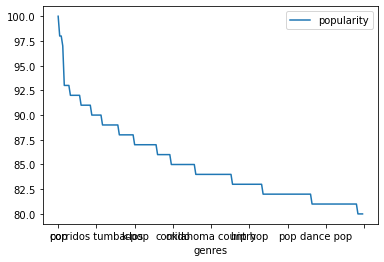

In [18]:
df_art.plot(x='genres', y = 'popularity')

genres
afrofuturism           AxesSubplot(0.125,0.125;0.775x0.755)
album rock             AxesSubplot(0.125,0.125;0.775x0.755)
alt z                  AxesSubplot(0.125,0.125;0.775x0.755)
alternative hip hop    AxesSubplot(0.125,0.125;0.775x0.755)
alternative metal      AxesSubplot(0.125,0.125;0.775x0.755)
                                       ...                 
reggaeton              AxesSubplot(0.125,0.125;0.775x0.755)
reggaeton flow         AxesSubplot(0.125,0.125;0.775x0.755)
sad sierreno           AxesSubplot(0.125,0.125;0.775x0.755)
trap boricua           AxesSubplot(0.125,0.125;0.775x0.755)
trap latino            AxesSubplot(0.125,0.125;0.775x0.755)
Name: popularity, Length: 89, dtype: object

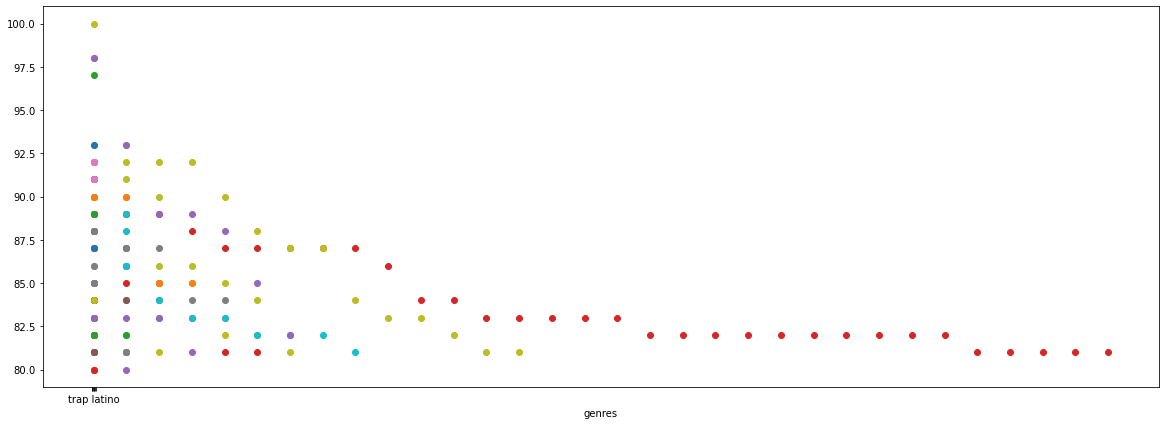

In [19]:
df_art_cleaned = df_art[df_art['genres'] != 'None']

df_art_cleaned.set_index('genres', inplace=True)
df_art_cleaned.groupby('genres')['popularity'].plot(style = 'o', figsize = (20,7))

In [20]:
df_genres = df_art.groupby(['genres'])['genres'].count()
df_genres.sort_values(ascending = False, inplace = True)
df_genres.head(10)

genres
dance pop        32
pop              14
latin hip hop     9
atl hip hop       7
reggaeton         7
hip hop           6
corrido           6
k-pop             5
colombian pop     5
melodic rap       4
Name: genres, dtype: int64

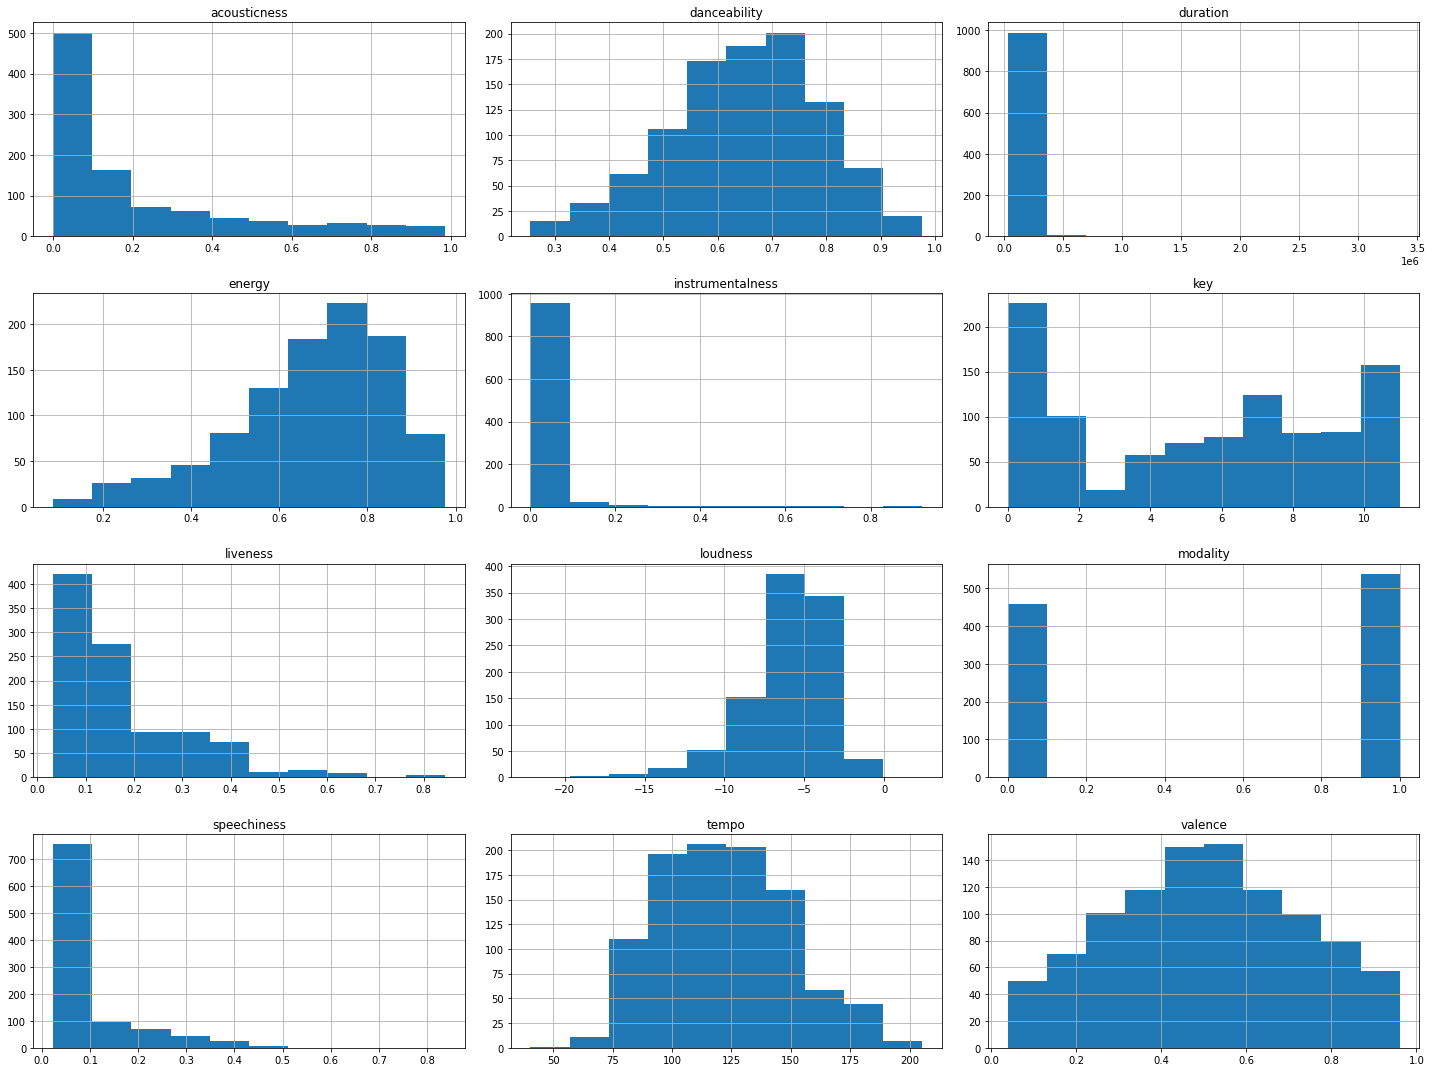

In [21]:
### AUDIO PRE-ANALYSIS
counter = 0

plt.rcParams["figure.figsize"] = [20, 15]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(4, 3)

for feature in df_audiofeat.drop('id', axis = 1):
    i = counter // 3
    j = counter % 3
    df_audiofeat.hist(feature, ax = axes[i,j])
    counter += 1

plt.show()

In [22]:
df_audiofeat

df_audiofeat["popularity"] = 0

for track_id in df_audiofeat.id:
    df_audiofeat.loc[df_audiofeat.id == track_id, 'popularity'] = df_track.loc[df_track['id'] == track_id, 'popularity']
    

In [23]:
df_audiofeat.head()

,id,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,modality,speechiness,tempo,valence,popularity
0,6AQbmUe0Qwf5PZnt4HmTXv,0.2520,0.696,131013,0.809,0.000128,5,0.2480,-8.254,1,0.0500,132.962,0.857,97.0
1,0yLdNVWF3Srea0uzk55zFn,0.0632,0.707,200455,0.681,0.000005,0,0.0322,-4.325,1,0.0668,117.999,0.646,100.0
2,59uQI0PADDKeE6UZDTJEe8,0.4590,0.517,163855,0.675,0.000000,6,0.1510,-5.382,1,0.0357,203.853,0.518,89.0
3,7K3BhSpAxZBznislvUMVtn,0.4670,0.492,163855,0.675,0.000000,6,0.1420,-5.456,1,0.0389,203.759,0.478,87.0
4,7oDd86yk8itslrA9HRP2ki,0.2320,0.531,232857,0.525,0.000000,1,0.4410,-6.500,0,0.0671,66.900,0.502,95.0


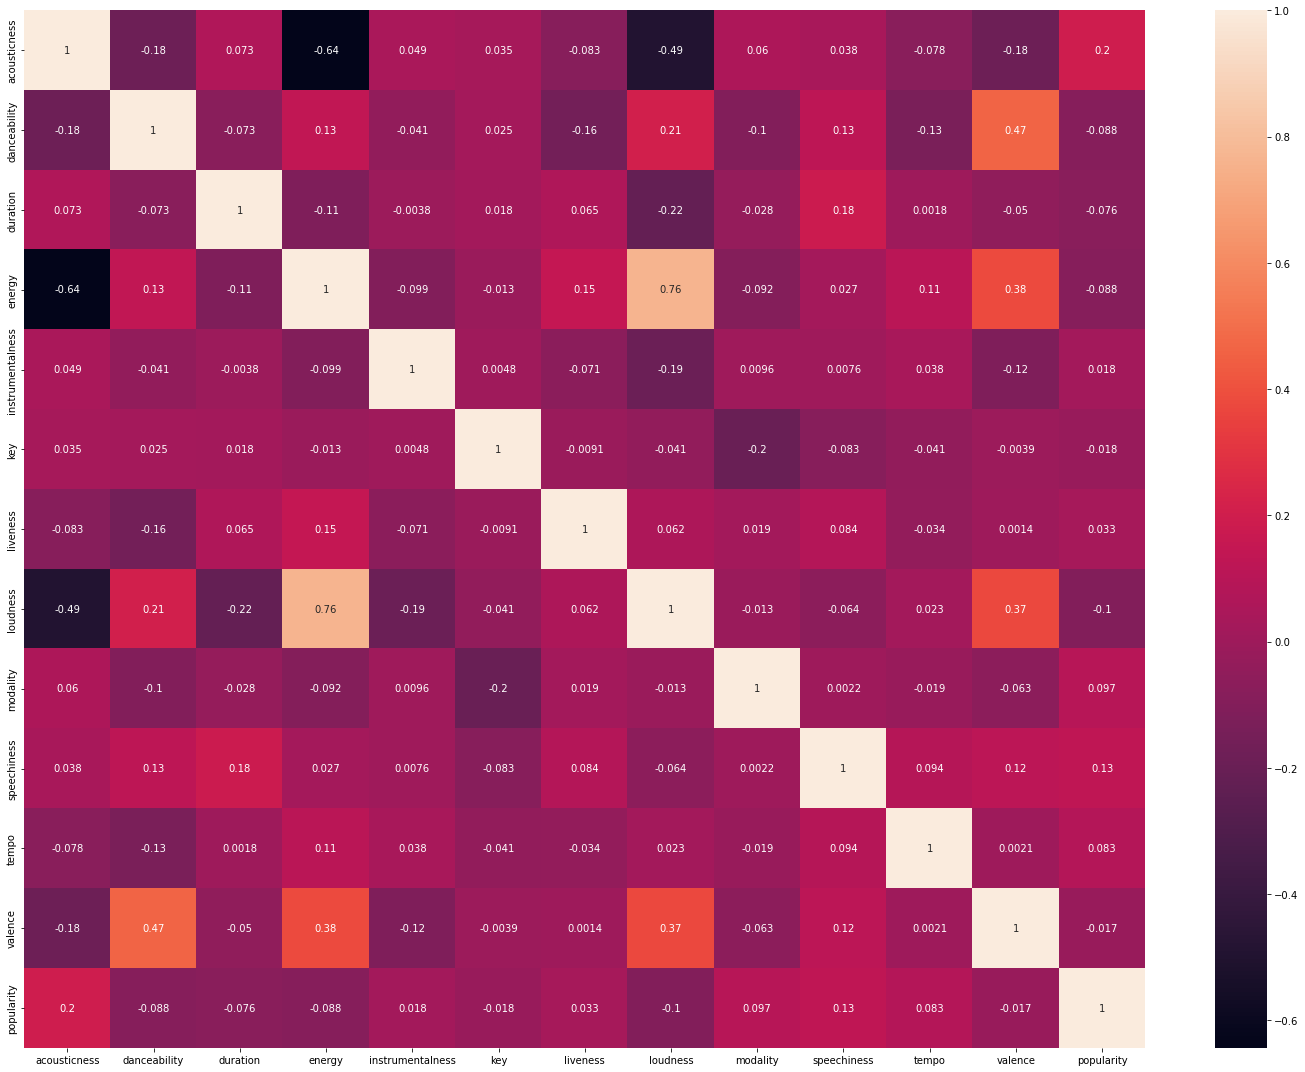

In [24]:
## CORRELATION BETWEEN FEATURES 
corr_matrix = df_audiofeat.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()